# 한글 폰트 출력 오류 해결

In [ ]:
#한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
#런타임 - 런타임 다시 시작 후 폰트 지정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 라이브러리 및 데이터

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import files
myfile = files.upload()

Saving movies_train.csv to movies_train (1).csv


In [ ]:
df=pd.read_csv("movies_train.csv")
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


# 데이터 요약

In [ ]:
print(df.shape)

(600, 13)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
 12  month           600 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 61.1+ KB


# 데이터의 요약통계량 확인

In [ ]:
df.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


# 결측치 확인 및 데이터 전처리

In [ ]:
#dir_prev_bfnum 변수에 결측값이 존재한다.
df.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
month               0
dtype: int64

In [ ]:
# 결측값의 특성 확인
df[df['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526,5
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778,2


In [ ]:
print(df[df['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0


In [ ]:
#dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 
#즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

df['dir_prev_bfnum'].fillna(0, inplace=True)

In [ ]:
#release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. 
#release_time을 datetime형식으로 변환한다.

df['release_time']=pd.to_datetime(df['release_time'])

In [ ]:
# 모든 칼럼에 결측값이 없으며, release_time 변수가 datetime형으로 변환되었음을 확인할 수 있다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
 12  month           600 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 61.1+ KB


# 데이터 시각화 및 분석

## 1) 장르별 스텝수, 주연배우수, 관객수
### 1-1) 장르별 스텝수

Text(0.5, 1.0, '장르별 스텝수의 중간값')

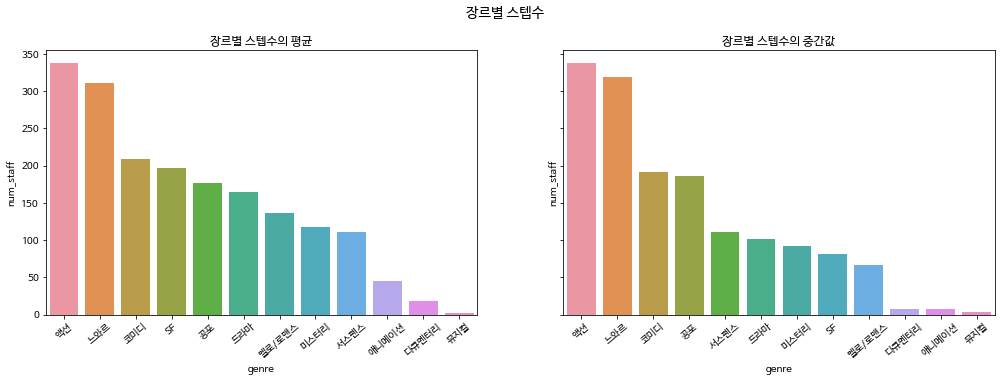

In [ ]:
#장르별 스텝수 평균
mean_genre_people = df.groupby('genre')[['num_staff','num_actor','box_off_num']].mean().round().reset_index()
mean_genre_staff = mean_genre_people.sort_values(ascending=False, by='num_staff')
#장르별 스텝수 중간값
median_genre_people = df.groupby('genre')[['num_staff','num_actor','box_off_num']].median().round().reset_index()
median_genre_staff = median_genre_people.sort_values(ascending=False, by='num_staff')

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(17,5))
fig.suptitle('장르별 스텝수', fontsize=14)
fig.subplots_adjust(top=0.86)

sns.barplot(data=mean_genre_staff, x='genre', y='num_staff', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 40)
axes[0].set_title('장르별 스텝수의 평균')

sns.barplot(data=median_genre_staff, x='genre', y='num_staff', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 40)
axes[1].set_title('장르별 스텝수의 중간값')

장르별로 스텝수의 차이가 있는 것을 확인할 수 있다. 액션, 느와르 장르의 경우 주로 스텝이 많이 필요한 것으로 보이고, 애니메이션, 다큐멘터리, 뮤지컬 장르의 경우는 스텝이 적게 참여하는 것으로 보인다. 

### 1-2) 장르별 주연배우수

Text(0.5, 1.0, '장르별 주연배우수의 중간값')

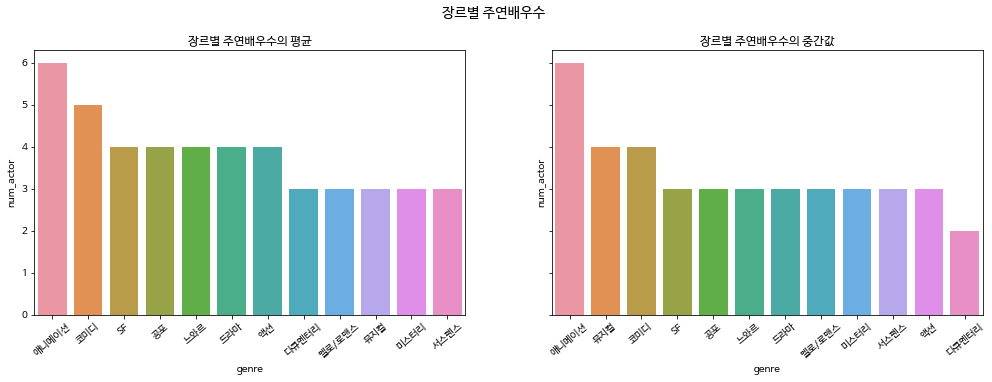

In [ ]:
#장르별 주연배우수 평균
mean_genre_people = df.groupby('genre')[['num_staff','num_actor','box_off_num']].mean().round().reset_index()
mean_genre_actor = mean_genre_people.sort_values(ascending=False, by='num_actor')
#장르별 주연배우수 중간값
median_genre_people = df.groupby('genre')[['num_staff','num_actor','box_off_num']].median().reset_index()
median_genre_actor = median_genre_people.sort_values(ascending=False, by='num_actor')

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(17,5))
fig.suptitle('장르별 주연배우수', fontsize=14)
fig.subplots_adjust(top=0.86)

sns.barplot(x='genre', y='num_actor', data=mean_genre_actor, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 40)
axes[0].set_title('장르별 주연배우수의 평균')

sns.barplot(x='genre', y='num_actor', data=median_genre_actor, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 40)
axes[1].set_title('장르별 주연배우수의 중간값')

장르별 주연배우수를 비교해보면, 애니메이션이 주로 주연배우수가 많은 것으로 나타나지만 대체적으로 장르에 따라 주연배우수의 차이가 딱히 크지 않은 것으로 보인다.

### 1-3) 장르별 관객수

Text(0.5, 1.0, '장르별 관객수의 중간값')

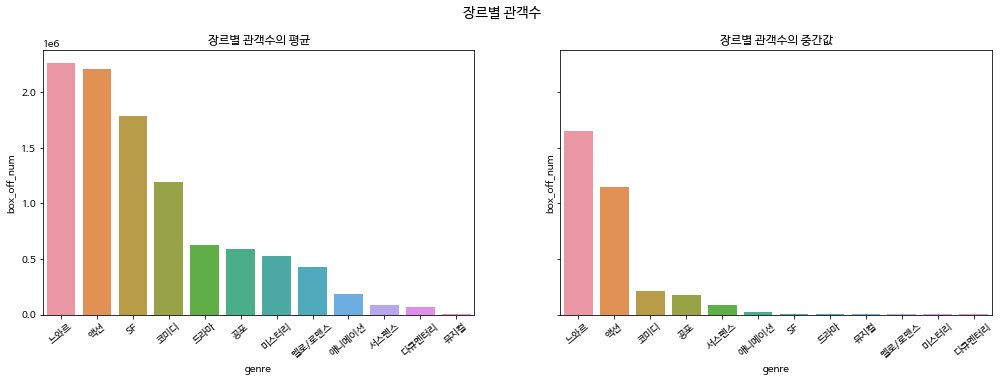

In [ ]:
#장르별 관객수 평균
mean_genre_people = df.groupby('genre')[['num_staff','num_actor','box_off_num']].mean().round().reset_index()
mean_genre_box_off = mean_genre_people.sort_values(ascending=False, by='box_off_num')
#장르별 관객수 중간값
median_genre_people = df.groupby('genre')[['num_staff','num_actor','box_off_num']].median().round().reset_index()
median_genre_box_off = median_genre_people.sort_values(ascending=False, by='box_off_num')

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(17,5))
fig.suptitle('장르별 관객수', fontsize=14)
fig.subplots_adjust(top=0.86)

sns.barplot(data=mean_genre_box_off, x='genre', y='box_off_num', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 40)
axes[0].set_title('장르별 관객수의 평균')

sns.barplot(data=median_genre_box_off, x='genre', y='box_off_num', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 40)
axes[1].set_title('장르별 관객수의 중간값')

장르별로 관객수를 비교해 볼 때, 느와르, 액션의 경우 대체적으로 관객수가 많지 않은 영화가 대부분이라 장르와 관객수의 관계를 파악하기 어려워 보인다.

## 2) 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화와 해당 영화 관객수의 관계
### 2-1) 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(dir_prev_bfnum)와 해당 영화 관객수(box_off_num)의 관계

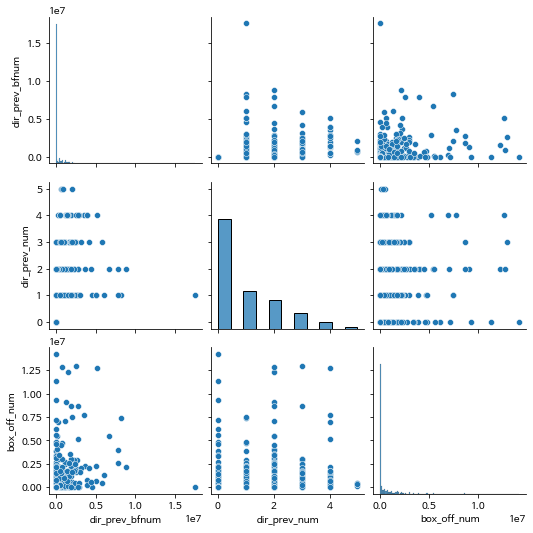

In [ ]:
sns.pairplot(df[['dir_prev_bfnum', 'dir_prev_num', 'box_off_num']])

Text(0.5, 1.0, '감독의 제작경험이 존재하는 경우')

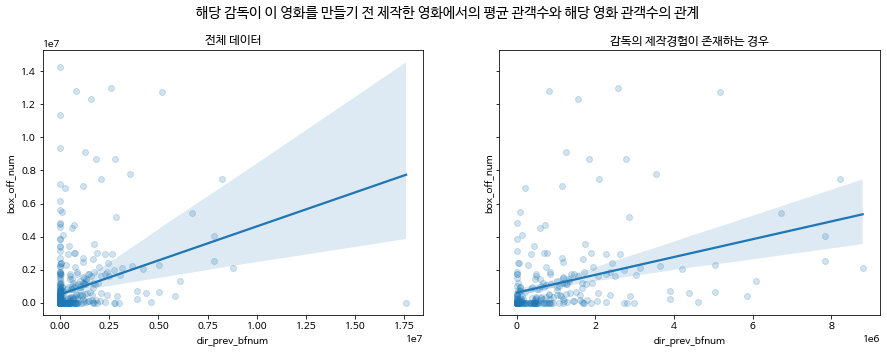

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))
fig.suptitle('해당 감독이 이 영화를 만들기 전 제작한 영화에서의 평균 관객수와 해당 영화 관객수의 관계', fontsize=14)
fig.subplots_adjust(top=0.86)

sns.regplot(data=df, x='dir_prev_bfnum', y='box_off_num', ax=axes[0], scatter_kws={'alpha':0.2})
axes[0].set_title('전체 데이터')

df_dir_experienced = df[(df['dir_prev_num'] > 0) & (df['dir_prev_bfnum'] < max(df['dir_prev_bfnum']))]  #outlier 제외
sns.regplot(data=df_dir_experienced, x='dir_prev_bfnum', y='box_off_num', ax=axes[1], scatter_kws={'alpha':0.2})
axes[1].set_title('감독의 제작경험이 존재하는 경우')

해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수와 해당 영화 관객수의 관계를 볼 때, dir_prev_bfnum, box_off_num 자료의 상당수가 0 근처에 분포하여 둘 사이의 명확한 인과관계를 파악하기는 어렵다. 따라서 제작 경험이 있는 감독만 따로 파악해보더라도, 이 경우 역시 뚜렷한 인과성은 찾기 어렵다.

### 2-2) 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(dir_perv_num)와 해당 영화의 관객수(box_off_num)의 관계

Text(0.5, 1.0, '감독의 제작경험이 존재하는 경우')

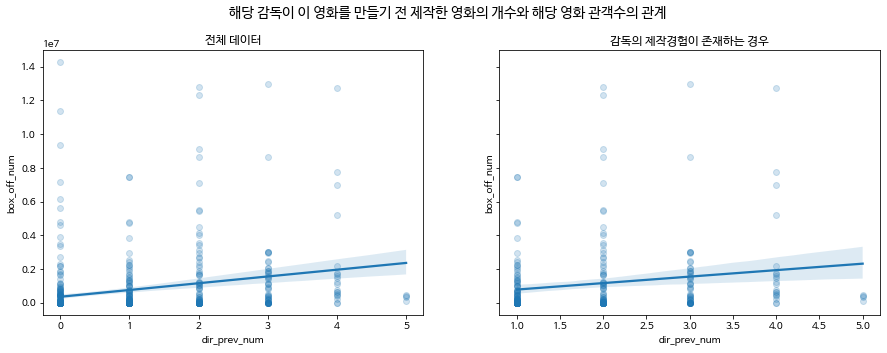

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))
fig.suptitle('해당 감독이 이 영화를 만들기 전 제작한 영화의 개수와 해당 영화 관객수의 관계', fontsize=14)
fig.subplots_adjust(top=0.86)

sns.regplot(data=df, x='dir_prev_num', y='box_off_num', ax=axes[0], scatter_kws={'alpha':0.2})
axes[0].set_title('전체 데이터')

df_dir_experienced = df[df['dir_prev_num'] > 0]
sns.regplot(data=df_dir_experienced, x='dir_prev_num', y='box_off_num', ax=axes[1], scatter_kws={'alpha':0.2})
axes[1].set_title('감독의 제작경험이 존재하는 경우')

해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수와 해당 영화 관객수의 관계를 볼 때, 제작 경험과 관객수 간의 명확한 인과관계를 파악하기는 어려워 보인다.

## 3) 제작 영화 수 TOP5 배급사별 제작장르

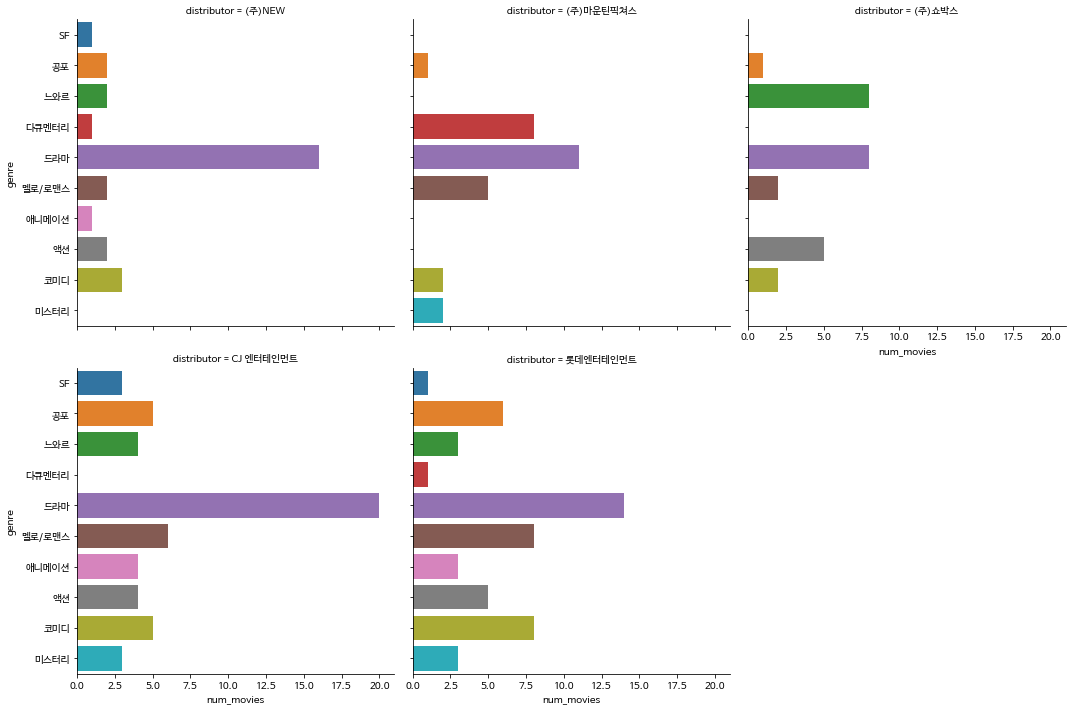

In [ ]:
# 제작 영화 수가 가장 많은 배급사 TOP5
distributor_top5 = df['distributor'].value_counts().head(5)

df_dt_genre = df.groupby(['distributor', 'genre'])['title'].count().reset_index()
df_dt_genre.columns = ['distributor', 'genre', 'num_movies']

df_distributor_genre = df_dt_genre[df_dt_genre['distributor'].isin(distributor_top5.index)].copy()

ax = sns.catplot(data=df_distributor_genre, x='num_movies', y='genre',
            kind='bar', col='distributor', col_wrap=3)

제작 영화 수가 가장 많은 TOP5 배급사별로 제작하는 장르를 알아보면, 배급사별 제작장르가 각각 다른 것을 볼 수 있다. 대체적으로 드라마는 대부분의 배급사에서 제작하고 그 건수 또한 많지만, 다큐멘터리, 애니메이션, 미스터리 등 몇몇 장르는 배급사에 따라 아예 제작하지 않는 경우도 확인할 수 있다.

## 4) 상영등급과 관객수가 관련이 있는지


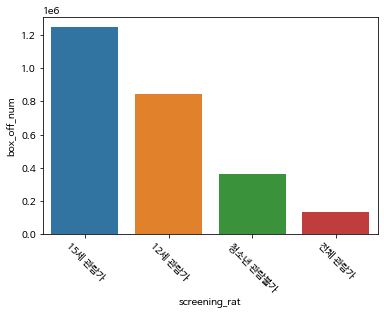

In [ ]:
rate_box_off_num=df[['screening_rat','box_off_num']].groupby('screening_rat').mean().sort_values('box_off_num', ascending=False)
ax = plt.subplots()
plt.xticks(rotation=-45)
ax = sns.barplot(x=rate_box_off_num.index, y='box_off_num', data=rate_box_off_num)

In [ ]:
rate_box_off_num

,box_off_num
screening_rat,
15세 관람가,1.247519e+06
12세 관람가,8.449809e+05
청소년 관람불가,3.641813e+05
전체 관람가,1.351005e+05


15세 관람가,12세 관람가,청소년 관람불가,전체 관람가 순으로 관객수가 많음을 알 수 있다.

## 5) 개봉일에 따른 관객수 변화 시각화


In [ ]:
df['month'] = df['release_time'].dt.month

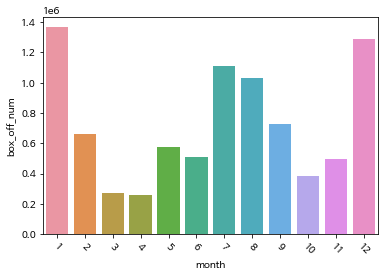

In [ ]:
month_box_off_num=df[['month','box_off_num']].groupby('month').mean().sort_values('box_off_num', ascending=False)
ax = plt.subplots()
plt.xticks(rotation=-45)
ax = sns.barplot(x=month_box_off_num.index, y='box_off_num', data=month_box_off_num)

In [ ]:
month_box_off_num

,box_off_num
month,
1,1.365931e+06
12,1.288248e+06
7,1.113807e+06
8,1.029162e+06
9,7.315286e+05
2,6.630252e+05
5,5.756852e+05
6,5.122865e+05
11,4.956539e+05


방학인 1월,12월,7월,8월에 다른 월들보다 많은 관객수가 있음을 확인 할 수 있다.

## 6) 주연배우수와 스텝수가 비례하는지


,num_actor,num_staff
num_actor,1.000000,0.077871
num_staff,0.077871,1.000000


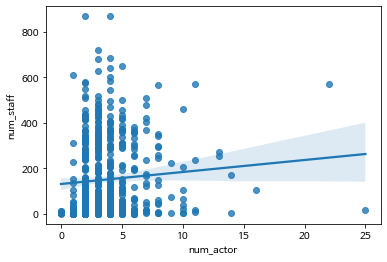

In [ ]:
sns.regplot(x='num_actor',y='num_staff',data=df)
df[['num_actor','num_staff']].corr()

주연배우수와 스텝수는 양의 상관관계를 보이기는 하나 회귀선에 벗어나는 오차들이 많고 상관계수가 매우 작기 때문에 뚜렷한 관계가 있다고 단정짓기 어렵다.

## 7) 주연배우수에 따른 영화 시간의 관계

Text(0, 0.5, 'Running time')

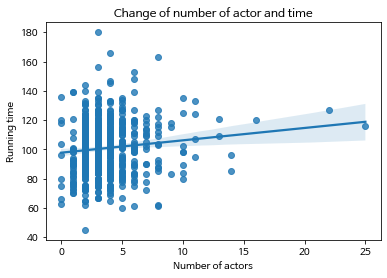

In [ ]:
ax = plt.subplots()
ax = sns.regplot(x = 'num_actor', y = 'time', data = df)
ax.set_title('Change of number of actor and time')
ax.set_xlabel('Number of actors')
ax.set_ylabel('Running time')

주연배우수가 많아질수록, 영화 시간이 점진적으로 증가함을 알 수 있다. 하지만, 주연 배우수와가 적을 때는, 배우의 수와는 관계없이 러닝타임이 고르게 분포함을 알 수 있다.

## 8) 감독의 평균 관객수와 스텝수, 주연배우수의 관계

Text(0.5, 1.0, '감독의 평균 관객수에 따른 주연배우수')

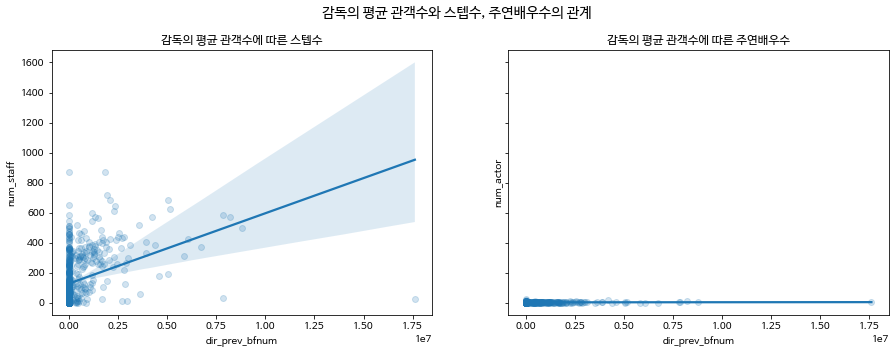

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))
fig.suptitle('감독의 평균 관객수와 스텝수, 주연배우수의 관계', fontsize=14)
fig.subplots_adjust(top=0.86)

sns.regplot(data=df, x='dir_prev_bfnum', y='num_staff', ax=axes[0], scatter_kws={'alpha':0.2})
axes[0].set_title('감독의 평균 관객수에 따른 스텝수')

sns.regplot(data=df, x='dir_prev_bfnum', y='num_actor', ax=axes[1], scatter_kws={'alpha':0.2})
axes[1].set_title('감독의 평균 관객수에 따른 주연배우수')

스텝의 수는 감독의 평균 관객수가 증가함에 따라 함께 증가하는 경향이 있음을 알 수 있었다. 그러나 주연배우수의 경우 그 수가 적기도 하거니와 그래프를 보았을 때 감독의 평균 관객수와 상관없이 비슷함을 확인할 수 있다.

## 9) 상영시간에 따른 관객수

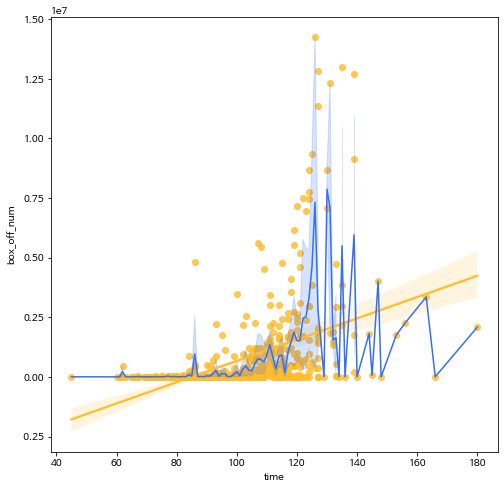

In [ ]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white')
sns.regplot(x="time", y="box_off_num", data=df, color ='#FFBC2B')
sns.lineplot(x="time", y="box_off_num",data=df,color='#356EFA')

그래프를 살펴보면 러닝타임이 120~ 140 분 사이일 때 관객수가 가장 많은 것을 알 수 있다. 반면 러닝타임이 100분 짧아지면 확연히 관객수가 준 모습을 볼 수 있었고 러닝타임이 140분 이상 길어져도 관객수가 적지 않음을 알 수 있다. 

## 10) 개봉일과 장르의 관계

In [ ]:
df['release_month'] = df['release_time'].dt.month

# 여름(6,7,8월)에 개봉한 영화
rel_summer = df[(df['release_month']==6) | (df['release_month']==7) | (df['release_month']==8)]
summer = rel_summer.groupby('genre')['title'].count().to_frame().sort_values(ascending=False,by='title')
summer = summer.reset_index()

# 겨울(12,1,2월)에 개봉한 영화
rel_winter = df[(df['release_month']==12) | (df['release_month']==1) | (df['release_month']==2)]
winter = rel_winter.groupby('genre')['title'].count().to_frame().sort_values(ascending=False,by='title')
winter = winter.reset_index()

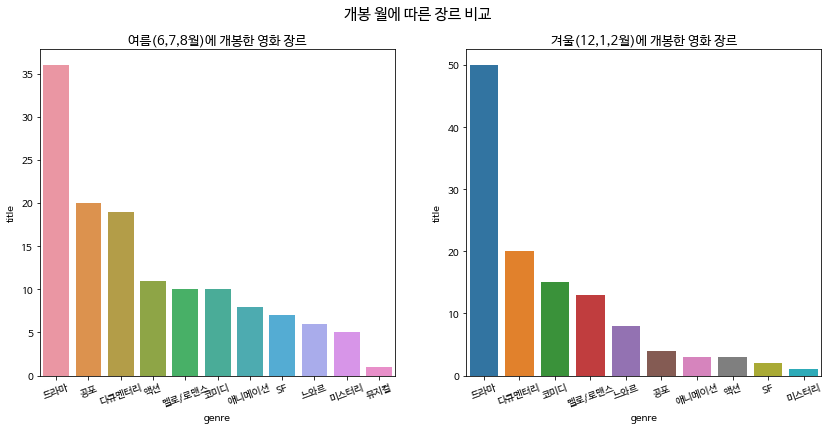

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle("개봉 월에 따른 장르 비교", fontsize=15)

sns.barplot(x='genre', y='title', data=summer, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 20)
ax[0].set_title('여름(6,7,8월)에 개봉한 영화 장르', fontsize=13)

sns.barplot(x='genre', y='title', data=winter, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 20)
ax[1].set_title('겨울(12,1,2월)에 개봉한 영화 장르', fontsize=13)

plt.show()

여름과 겨울 시즌에 모두 드라마 장르의 영화가 가장 많이 개봉하며, 겨울보다 여름에 공포 영화가 더 많이 개봉한다는 것을 알 수 있다.

## 11) 장르별 상영등급

In [ ]:
genre_name = df['genre'].value_counts().index
genre_name

Index(['드라마', '다큐멘터리', '멜로/로맨스', '코미디', '공포', '액션', '느와르', '애니메이션', '미스터리',
       'SF', '뮤지컬', '서스펜스'],
      dtype='object')

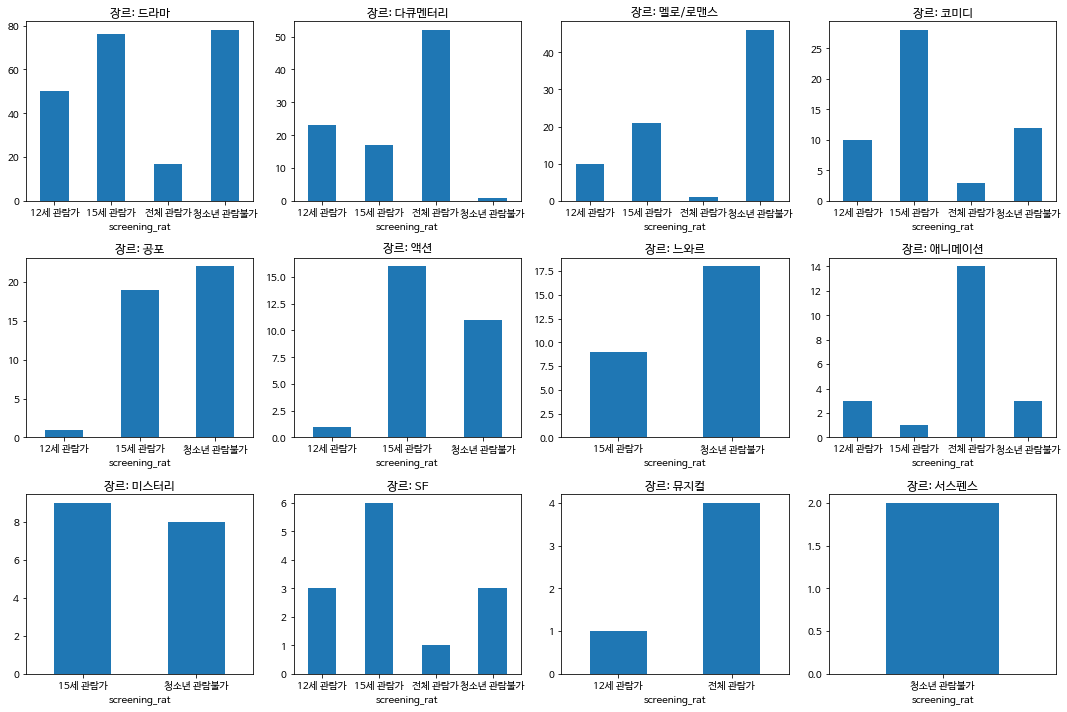

In [ ]:
fig = plt.figure(figsize=(15,10))
for i in range(1, 13):
  axi = fig.add_subplot(3,4,i)
  axi = df.loc[df['genre']==genre_name[i-1]].groupby('screening_rat')['title'].count().plot(kind='bar')
  plt.xticks(rotation=0)
  si = genre_name[i-1]
  axi.set_title(f"장르: {si}")
fig.tight_layout()

각 장르별 바그래프를 통해 어떤 상영등급을 가지고 있는지 확인할 수 있다. 공포, 느와르, 미스터리, 서스펜스의 장르는 전체관람가는 없고 대부분 15세 이상으로 관람가능 연령이 높다는 것을 알 수 있고, 애니메이션이나 뮤지컬, 다큐멘터리 같은 장르는 전체관람가가 가장 많아 낮은 연령대도 관람이 가능하다는 것을 알 수 있다.

## 12) 상영시간과 스텝수의 관계

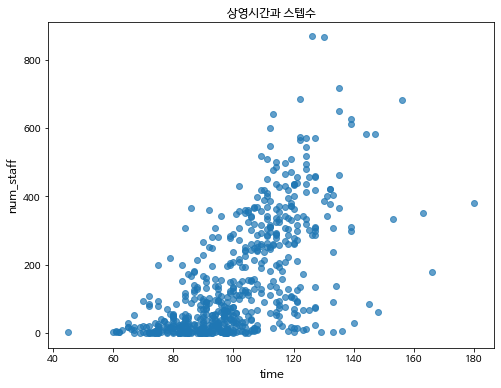

In [ ]:
ax = plt.figure(figsize=(8,6))
plt.scatter(x='time', y='num_staff', data=df, alpha=0.7)
plt.title("상영시간과 스텝수")
plt.xlabel("time", fontsize=12)
plt.ylabel("num_staff", fontsize=12)
plt.show()

상영시간이 100분 이하인 영화들은 참여하는 스텝수가 대부분 200명 이하이고, 상영시간이 100분을 넘으면 스텝수가 200명을 넘어 점점 증가하는 것을 확인할 수 있다. 따라서 영화 상영시간이 길수록 참여하는 스텝수가 증가하는 경향이 있다고 볼 수 있다.

## 13) 장르별 상영시간

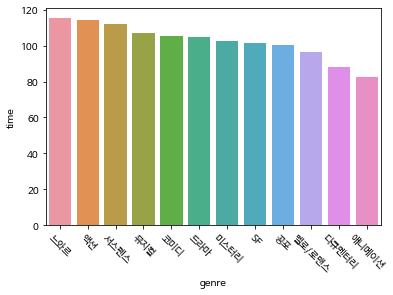

In [ ]:
#장르별 상영시간의 평균
ax = plt.subplots()
plt.xticks(rotation=-45)
mean_genre_time = df.groupby('genre')['time'].mean().to_frame().sort_values(ascending=False,by='time')
ax = sns.barplot(x=mean_genre_time.index, y='time', data=mean_genre_time)

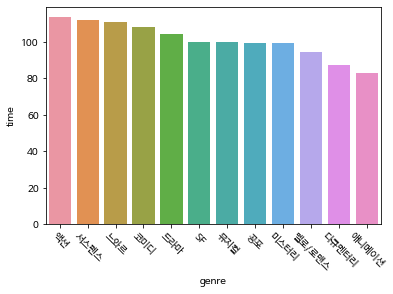

In [ ]:
#장르별 상영시간의 중간값
ax = plt.subplots()
plt.xticks(rotation=-45)
mean_genre_time = df.groupby('genre')['time'].median().to_frame().sort_values(ascending=False,by='time')
ax = sns.barplot(x=mean_genre_time.index, y='time', data=mean_genre_time)

장르별로 상영시간의 평균과 중간값에 차이가 있는 것을 확인할 수 있다. 느와르, 액션, 서스펜스의 경우 주로 상영시간이 길고 멜로/로맨스, 다큐멘터리, 애니메이션의 경우 주로 상영시간이 짧다.

## 14) 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수와 현재 제작한 영화의 스텝 수의 관계



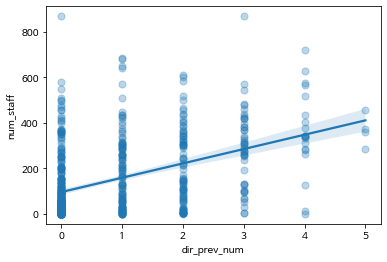

In [ ]:
#dir_prev_num과 스텝 수의 관계
ax = plt.subplots()
ax = sns.regplot(x='dir_prev_num', y='num_staff', data=df, 
                 fit_reg=True, scatter_kws={'alpha':0.3,'s':50})

해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수가 증가할수록 영화 제작에 참여한 스텝수가 증가하는 것을 확인할 수 있다.

## 15) 배급사별 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수

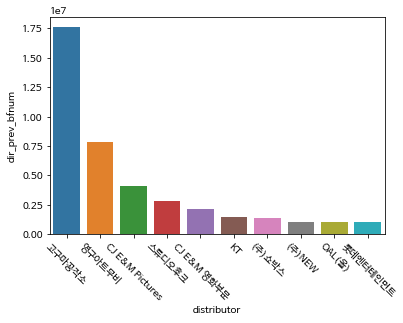

In [ ]:
#배급사에서 dir_prev_bfnum을 고려하는지
ax = plt.subplots()
plt.xticks(rotation=-45)
dist_prev_bfnum = df.groupby('distributor')['dir_prev_bfnum'].mean().to_frame().sort_values(ascending=False,by='dir_prev_bfnum')[:10]
ax = sns.barplot(x=dist_prev_bfnum.index, y='dir_prev_bfnum', data=dist_prev_bfnum)

해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수가 많은 10개의 배급사 뽑아서 살펴보았다. 고구마공작소, 영구아트무비, CJ E&M Pictures, 스튜디오후크, CJ E&M 영화부문 배급사만 다른 배급사에 비해 dir_prev_bfnum가 높은 것을 볼 수 있으며 나머지 배급사는 비슷하다. 특히, 고구마공작소의 경우 dir_prev_bfnum값이 다른 배급사에 비해 훨씬 높은 것을 확인할 수 있다.